## Unidade 01 - Projeto 01

- **Aluno**: Ailson Forte dos Santos
- **Matrícula**: 2016041269

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
arquivo = 'imd_notas.xlsx'
excel = pd.ExcelFile(arquivo)
dados = excel.parse(0)
dados.head()

,a_ID,CEP,ano_ingresso,periodo_ingresso,status,ano_disciplina,periodo_disciplina,nota,disciplina_ID,status.disciplina,enen-nota
0,0,59015430,2014,1,CANCELADO,2014,2,2.6,0,Reprovado,618.0
1,0,59015430,2014,1,CANCELADO,2015,1,8.0,0,Aprovado,618.0
2,1,59073120,2014,1,CANCELADO,2014,2,0.1,0,Reprovado,615.0
3,2,59072580,2014,1,ATIVO,2014,2,6.1,0,Aprovado,600.0
4,3,59088150,2014,1,ATIVO,2014,1,3.0,0,Reprovado,673.0


#### 1)  Quantas vezes um aluno precisa fazer uma determinada disicplina para ter aprovação?
    a) Por disciplina?
    b) Geral (considerando as 7  disciplinas)?

In [3]:
discs = []
qtd_disc = [] # quantidade de alunos distintos em cada disciplina
for i in dados['disciplina_ID'].unique():
    discs.append([])
    qtd_disc.append([])
for row in dados.get_values():
    elem = row.tolist()
    discs[elem[8]].append(elem)
print('a)')
for i in dados['disciplina_ID'].unique():
    for l in discs[i]:
        aluno = l[0]
        if aluno not in qtd_disc[i]:
            qtd_disc[i].append(aluno)
    print('ID Disciplina ' + str(i) + ' - ' + str(len(discs[i])/len(qtd_disc[i])))
print('b)')
qtd = 0
for i in dados['disciplina_ID'].unique():
    qtd = qtd + len(discs[i])/len(qtd_disc[i])
print(qtd/7)

a)
ID Disciplina 0 - 1.3987473903966596
ID Disciplina 1 - 1.044414535666218
ID Disciplina 2 - 1.2035398230088497
ID Disciplina 3 - 1.4821917808219178
ID Disciplina 4 - 1.0715421303656598
ID Disciplina 5 - 1.497131931166348
ID Disciplina 6 - 1.2516129032258065
b)
1.27845435637878


#### 2) Quais as regiões tem mais índices de aprovação nos componentes curriculares? Hist.

In [13]:
%matplotlib inline
# dados.plot(kind='hist',x='status.disciplina',y='CEP',color='green')

#### 3) Como estão caracterizados a  estatística de notas das diversas disciplinas que compoe o dataset? Boxplot
    a) Período (ano)
    b) Geral

#### 4) Existe correlação entre as notas dos diferentes componentes curriculares? Dispersão

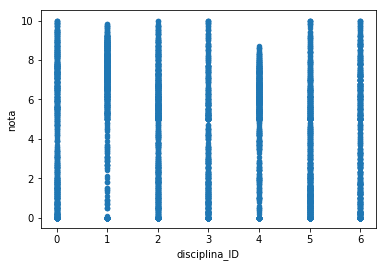

In [14]:
dados.plot(kind='scatter',x='disciplina_ID',y='nota')

#### 5) Existe uma relação entre o  número médio de disciplinas cursadas por aluno e  o  seu desempenho? Dispersão

#### 6) Existe correlação entre a  nota do enen e  o  status do aluno? Hist.

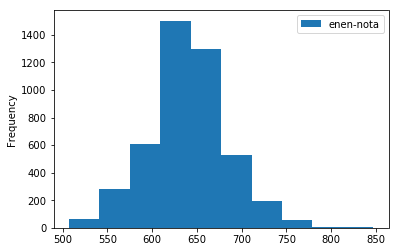

In [17]:
dados.plot(kind='hist',x='status',y='enen-nota')

#### 7) Existe algum componente curricular na base de dados que possui uma alta correlação com os dados do ENEN? Disperção